# Analysing topics with hSBM

In order to explore the content of the collected Wikipedia pages, we deploy a  hierarchical stochastic block model (hSBM). The model is used to identify prevalent topics in a text corpora, and it relies on integration of  teqniques used for community detection in networks (Gerlach et al. 2018). HSBM has proven to perform better than the more widely used latent Dirichlet allocation (LDA). Topics can be identified by the HSBM by representing the text corpora as a bipartite network in which nodes are documents and words, and the weight of the edges connecting nodes are determined by word-occurrences in each document. The model automatically detects the relevant number of topics and makes a hierarchical clustering of nodes (ibid.).

We were only able to run the hSBM in Google Colab. The code is attached and it can also be found through the link below. Through the hSBM we identifyied e list of topics and corresponding probabilities for each document to belong to a certain topic. We stored this information in a dataframe to be able to further analyse it in this notebook.

https://colab.research.google.com/drive/10_H2VPqhq69gVBz0nWEyC8aqVadAq9lc?usp=sharing

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
# We read the dataframes with data from HSBM 
topics=pd.read_csv('HSBM_topics_28.11.csv')
topics.drop('Unnamed: 0', axis = 'columns', inplace = True)
HSBM_probs=pd.read_csv('HSBM_probs_28.11.csv')
HSBM_probs.drop('Unnamed: 0', axis = 'columns', inplace = True)



**Plotting result of HSBM** <br>
We plot the word-document bipartite network generated thought hSBM. Document-nodes are on the left, and word-nodes are on the right. Colors correspond to the different groups. The nodes of words and documents are grouped on multiple levels.On the highest level (in the center of the graph) all nodes belong to the same group, on the second highest level the network is splot into word- and document-nodes. We are interested in the word-groups as these correspond to topics of the documents. The SBM has a hierarchical structure which implies that topics at the lowest levels (far to the right) contain more granular information about the content of the documents, whereas, topics at higher levels are clusters of the lower level topics and, thus, more aggregate (ref). 

The hSBM generates 416 topics at Level 0, 48 topics at Level 1, 7 topics at Level 2, and 2 topics at Level 3. We choose to work with topics at level 2 which we deem to be the most appropriate level to examine as the topics appear to be reasonably coherent and manageable to manually select from. A list of topics at all levels is attached in Appendix X.

The documents on the left side are sorted such that the disciplines appear alphabethically such that anthropologists are the first nodes and the last are sociologists. The number of documents vary within each discipline, and thus we show the order in the table below. From the graph below we can sense how the document-nodes seem to cluster in what might correspond to disciplinary groupings. This is sespecially true for the cluster document nodes in the bottom which could indicate a sociology group.

In [3]:
HSBM_probs

name discipline  community  \
0                      A. H. J. Prins       anth          1   
1                          Adam Kuper       anth          1   
2                     Alan Macfarlane       anth          6   
3                  Albert Buell Lewis       anth          1   
4                         Alfred Gell       anth          1   
5               Anthony F. C. Wallace       anth          1   
6                          Anton Blok       anth          1   
7               Arthur Maurice Hocart       anth          5   
8     Arturo Escobar (anthropologist)       anth          5   
9                      Ashley Montagu       anth          1   
10                    Audrey Richards       anth          1   
11                 Benjamin Lee Whorf       anth          6   
12                         Bill Irons       anth          1   
13                Bronisław Piłsudski       anth          5   
14                      Bruce Trigger       anth          1   
15                   Camilla Wedgwood       anth          1   
16                   Carleton S. Coon       anth          1   
17               Christian Bromberger       anth          5   
18                      Clark Wissler       anth          1   
19                       Cora Du Bois       anth          1   
20               Daisy Bates (author)       anth          1   
21                      David Graeber       anth          5   
22                         Dell Hymes       anth          3   
23                     Desmond Morris       anth          1   
24                        Dian Fossey       anth          1   
25                  Dmitri Bondarenko       anth          1   
26                 Dorothy A. Bennett       anth          1   
27                  E. Adamson Hoebel       anth          1   
28              E. E. Evans-Pritchard       anth          1   
29                     Earnest Hooton       anth          1   
...                               ...        ...        ...   
2070                    Tomáš Masaryk        soc          6   
2071                      Troy Duster        soc         14   
2072                    Tukufu Zuberi        soc          8   
2073                      Ulrich Beck        soc          5   
2074                  Victor Branford        soc          6   
2075                   Vilhelm Aubert        soc          3   
2076                  Viviana Zelizer        soc          3   
2077                   Vladimir Lenin        soc          5   
2078                        Vron Ware        soc          5   
2079                 W. E. B. Du Bois        soc          5   
2080                     W. I. Thomas        soc          3   
2081                     Walden Bello        soc          7   
2082                  Walter Benjamin        soc          5   
2083                Walter F. Buckley        soc          3   
2084                 Walter W. Powell        soc          3   
2085                  Wilhelm Dilthey        soc          6   
2086                Wilhelm Heitmeyer        soc         16   
2087              William Foote Whyte        soc          7   
2088                William H. Sewell        soc          3   
2089                 William H. Whyte        soc          5   
2090            William Julius Wilson        soc          7   
2091                     Will Herberg        soc          2   
2092              Wolfgang Schluchter        soc          5   
2093             Władysław Markiewicz        soc          1   
2094                    Yasuma Takada        soc          7   
2095                      Ziya Gökalp        soc          6   
2096                   Zygmunt Bauman        soc          5   
2097                     Ágnes Heller        soc          5   
2098               Élisabeth Badinter        soc          5   
2099                     Émile Littré        soc          6   

                                                   text         0         1  \
0     ['adriaan', 'hendrik', 'johan', 'generall

In [5]:
# Showing the order and number of documents for each discipline as they appear in the graph below. 
pd.DataFrame(HSBM_probs.groupby(['discipline']).size())

0
discipline     
anth        144
eco         825
multiple     86
pol         234
psy         300
soc         511

                 Bipartite network of documents and words


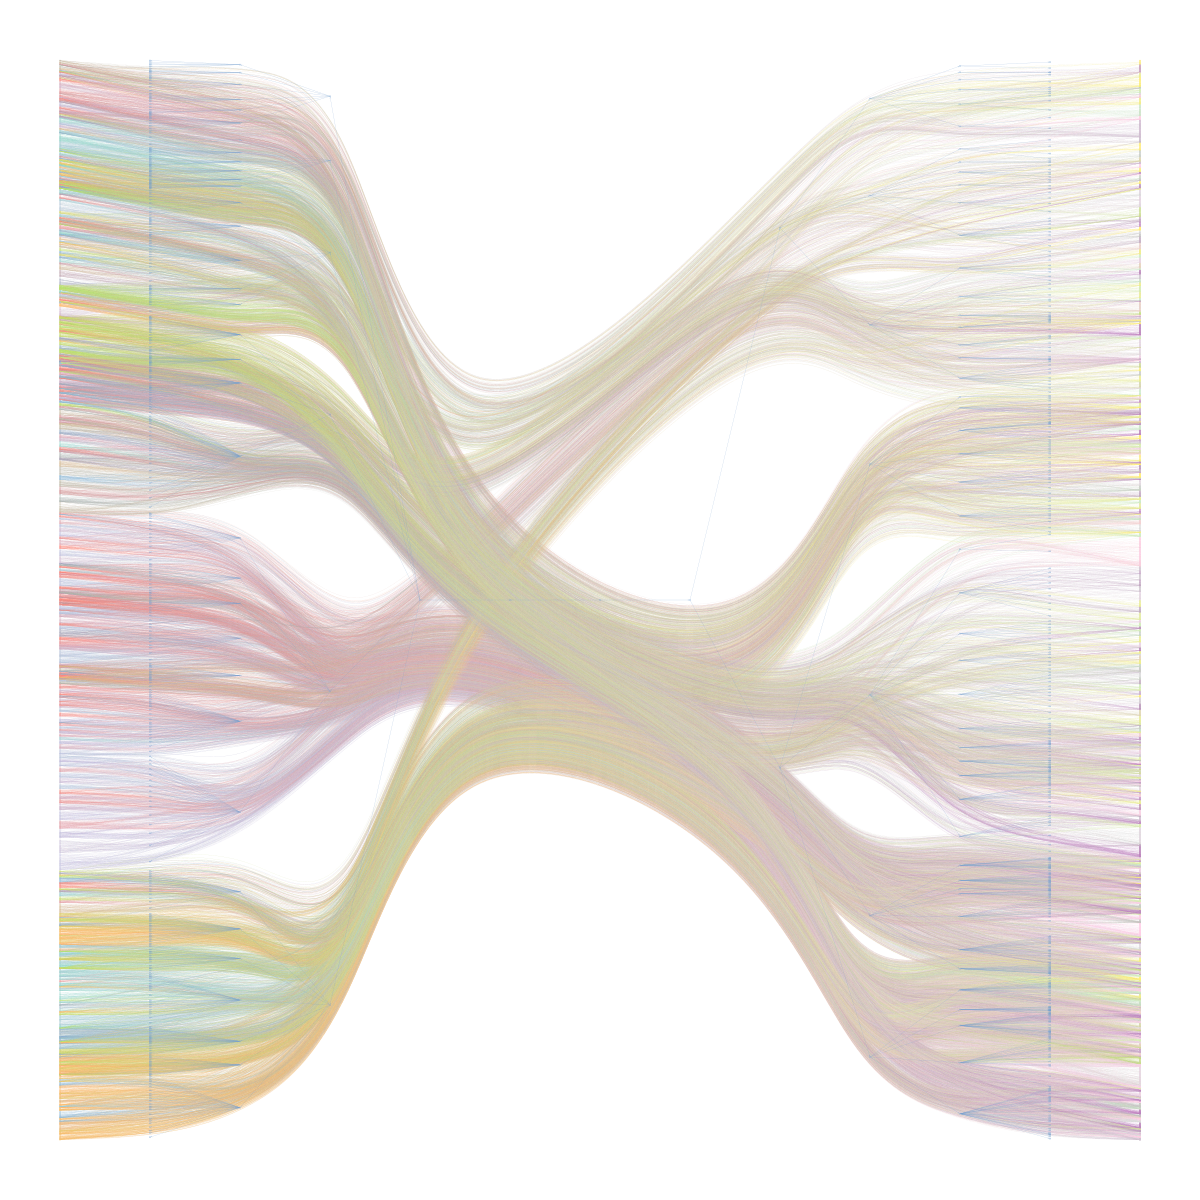

In [33]:
# We show the image of the bipartite network generated through th hSBM. 
print('                 Bipartite network of documents and words')
Image(filename = "hSBM_Topicmodel.png", width=600, height=600)


**Selecting relevant topics** 

For each of the generated topics, we examine the 10 most probable words in order to select a subset of topics which we assess to be the most interesting to further examine. We draw on a heuristic approach which implies that we select topics that we assess to be semantically coherent and exclusive. Furthermore, we only select topics that we assess to be related to the content of the theoretical contributions of the researchers and we discard topics that appear to be related to academic prestige, timely relevans (topics consisting only of years), and nationality (topics consisting of city names and words in non-English languages). We select a subset of 21 topics which we give appropriate descriptive names. 

7: Anthropology  <br>
10: Human nature  <br>
12: Foreign politics  <br>
14: Trade and capitalism  <br>
15: Science studies <br>
16: Cultural sociology <br>
17: Race <br>
19: War politics <br>
20: Measuring behavior  <br>
25: Mentality and personality  <br>
26: Conflict studies  <br>
27: Child/mother relations  <br>
28: Governing publics  <br>
37: Economics  <br>
38: Language studies  <br>
39: Religious stories  <br>
40: Market mechanisms  <br>
41: Philosophy  <br>
43: Power and classes  <br>
44: Cognitive psychology  <br>
46: Democratic policymaking  <br>

The full list of generated topics appear in the dataframe below

In [ ]:
**Selecting relevant topics** 

For each of the generated topics, we examine the 10 most probable words in order to select a subset of topics which we assess to be the most interesting to further examine. We draw on a heuristic approach which implies that we select topics that we assess to be semantically coherent and exclusive. Furthermore, we only select topics that we assess to be related to the content of the theoretical contributions of the researchers and we discard topics that appear to be related to academic prestige, timely relevans (topics consisting only of years), and nationality (topics consisting of city names and words in non-English languages). We select a subset of 21 topics which we give appropriate descriptive names. 

'7': 'Anthropology','10':'Human nature','12': 'Foreign politics','14': 'Trade and capitalism','15': 'Science studies','16': 'Cultural sociology','17': 'Race','19': 'War politics','20': 'Measuring behavior','25': 'Mentality and personality','26': 'Conflict studies','27':'Child/mother relations','28':'Governing publics','37':'Economics','38':'Language studies','39': 'Religious stories','40': 'Market mechanisms'  <br>
41: Philosophy  <br>
43: Power and classes  <br>
44: Cognitive psychology  <br>
46: Democratic policymaking  <br>

The full list of generated topics appear in the dataframe below

In [10]:
# Printing 
pd.set_option("display.max_rows", None, "display.max_columns", None)
topics

Topic      Topic_words  Probability_of_word_in_topic
0        0           london                      0.198140
1        0        cambridge                      0.155829
2        0           oxford                      0.118572
3        0              vol                      0.089803
4        0               ed                      0.072204
5        0        macmillan                      0.029331
6        0         equality                      0.021343
7        0         palgrave                      0.015664
8        0        australia                      0.015102
9        0              lse                      0.014603
10       1      association                      0.077940
11       1          chicago                      0.068518
12       1          harvard                      0.061657
13       1         relation                      0.055886
14       1     organization                      0.042930
15       1       california                      0.039309
16       1             2002                      0.037778
17       1        princeton                      0.035481
18       1         columbia                      0.032949
19       1       washington                      0.029032
20       2             work                      0.058268
21       2             also                      0.047233
22       2              one                      0.039610
23       2             year                      0.031512
24       2           became                      0.020827
25       2            later                      0.020370
26       2             many                      0.018048
27       2             well                      0.013286
28       2             part                      0.012913
29       2           called                      0.009833
30       3             life                      0.039754
31       3             idea                      0.028592
32       3            woman                      0.026028
33       3            known                      0.022168
34       3             view                      0.021281
35       3          thought                      0.021047
36       3           modern                      0.017791
37       3          concept                      0.017781
38       3             form                      0.017420
39       3          process                      0.016826
40       4           social                      0.095719
41       4           theory                      0.084808
42       4             book                      0.070927
43       4          science                      0.070435
44       4            study                      0.069943
45       4         research                      0.065745
46       4            press                      0.060043
47       4          society                      0.056601
48       4                –                      0.055032
49       4        published                      0.043250
50       5           school                      0.044025
51       5            world                      0.043056
52       5           member                      0.027653
53       5          article                      0.020033
54       5        including                      0.019268
55       5         interest                      0.018835
56       5         position                      0.016074
57       5           served                      0.014630
58       5           degree                      0.013771
59       5             role                      0.013754
60       6             isbn                      0.086107
61       6          journal                      0.056857
62       6           review                      0.039489
63       6            award                      0.029085
64       6           fellow                      0.027592
65       6         director                      0.021499
66       6          academy                      0.021430
67       6           center                      0.020311
68 

In [36]:
topic_dict={'7': 'Anthropology','10':'Human nature','12': 'Foreign politics','14': 'Trade and capitalism','15': 'Science studies','16': 'Cultural sociology','17': 'Race','19': 'War politics','20': 'Measuring behavior','25': 'Mentality and personality','26': 'Conflict studies','27':'Child/mother relations','28':'Governing publics','37':'Economics','38':'Language studies','39': 'Religious stories','40': 'Market mechanisms'}

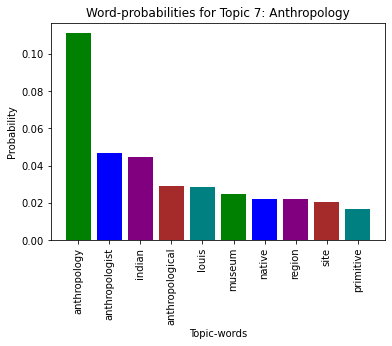

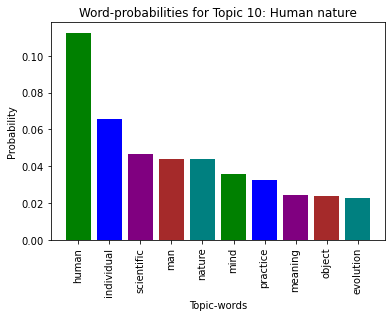

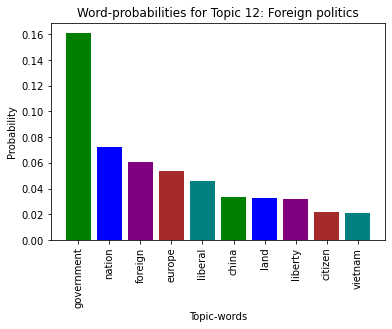

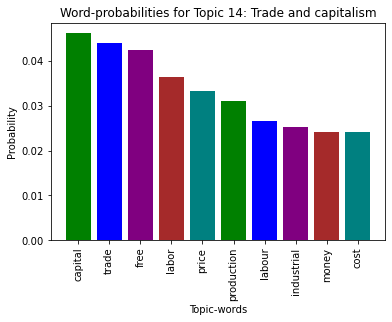

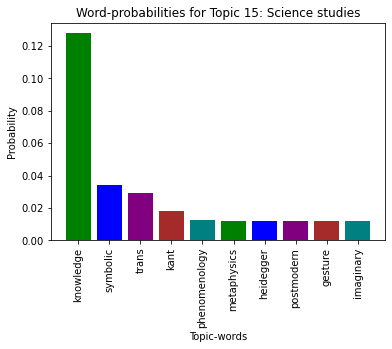

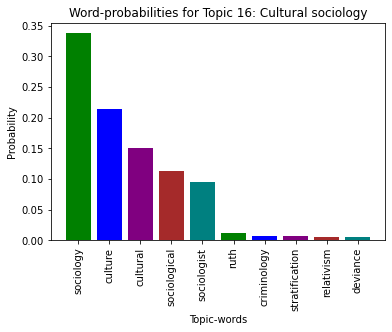

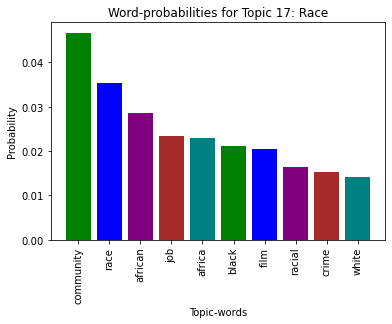

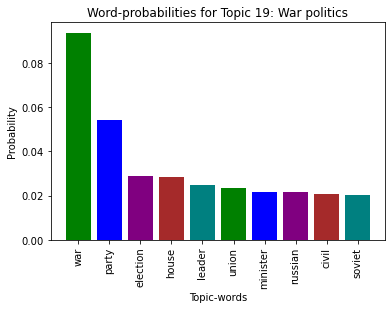

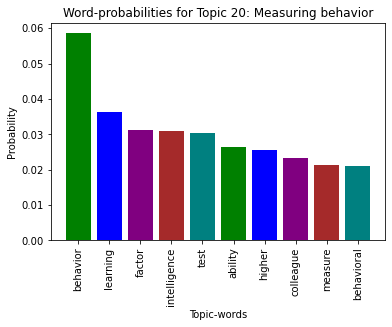

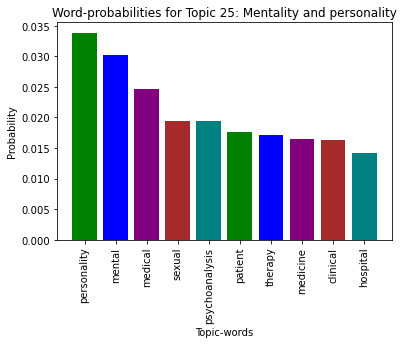

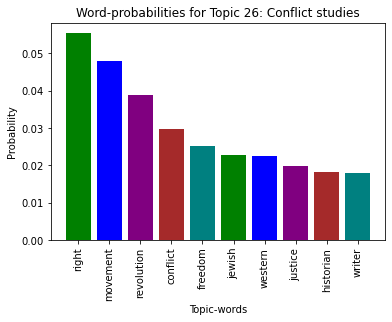

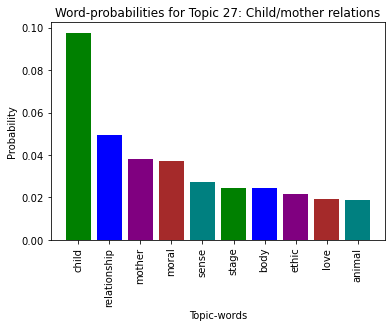

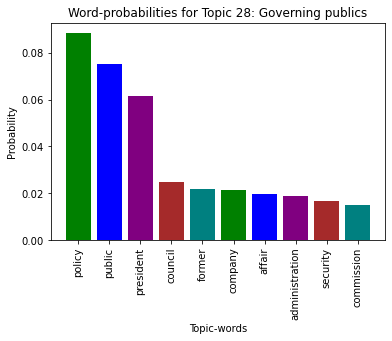

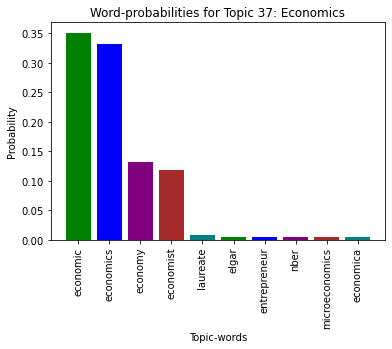

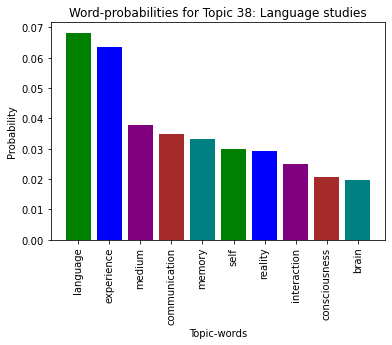

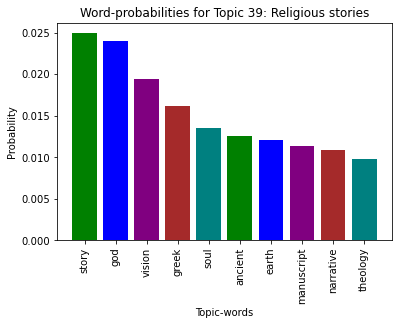

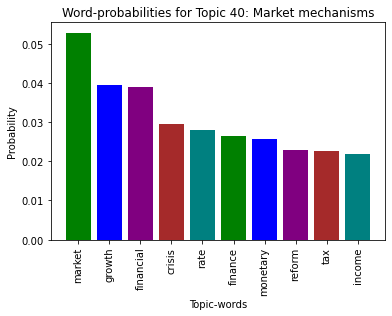

In [43]:
for i,t in topic_dict.items():
    plt.bar(list(topics[topics['Topic']==int(i)]['Topic_words']),list(topics[topics['Topic']==int(i)]['Probability_of_word_in_topic']),color= ['green','blue','purple','brown','teal'])
    plt.title('Word-probabilities for Topic {}: {}'.format(i,t))
    plt.xlabel('Topic-words')
    plt.ylabel('Probability')
    plt.xticks(rotation=90)

    plt.show()

In [37]:
HSBM_probs_topics=HSBM_probs[['name','discipline','community', 'text','7','10','12','14','15','16','17','19','20','25','26','27','28','37','38','39','40','41','43','44','46']]
HSBM_probs_topics=HSBM_probs_topics.rename(columns=topic_dict)

In [11]:
HSBM_probs_topics

name discipline  community  \
0                                A. H. J. Prins       anth          1   
1                                    Adam Kuper       anth          1   
2                               Alan Macfarlane       anth          6   
3                            Albert Buell Lewis       anth          1   
4                                   Alfred Gell       anth          1   
5                         Anthony F. C. Wallace       anth          1   
6                                    Anton Blok       anth          1   
7                         Arthur Maurice Hocart       anth          5   
8               Arturo Escobar (anthropologist)       anth          5   
9                                Ashley Montagu       anth          1   
10                              Audrey Richards       anth          1   
11                           Benjamin Lee Whorf       anth          6   
12                                   Bill Irons       anth          1   
13                          Bronisław Piłsudski       anth          5   
14                                Bruce Trigger       anth          1   
15                             Camilla Wedgwood       anth          1   
16                             Carleton S. Coon       anth          1   
17                         Christian Bromberger       anth          5   
18                                Clark Wissler       anth          1   
19                                 Cora Du Bois       anth          1   
20                         Daisy Bates (author)       anth          1   
21                                David Graeber       anth          5   
22                                   Dell Hymes       anth          3   
23                               Desmond Morris       anth          1   
24                                  Dian Fossey       anth          1   
25                            Dmitri Bondarenko       anth          1   
26                           Dorothy A. Bennett       anth          1   
27                            E. Adamson Hoebel       anth          1   
28                        E. E. Evans-Pritchard       anth          1   
29                               Earnest Hooton       anth          1   
30                                 Edmund Leach       anth          1   
31                        Edmund Snow Carpenter       anth          1   
32                                 Eduardo Kohn       anth          5   
33                   Eduardo Viveiros de Castro       anth          5   
34                                 Edward Sapir       anth          1   
35                              Eleanor Leacock       anth          5   
36                            Ella Cara Deloria       anth          1   
37                                Elman Service       anth          1   
38                          Elsie Clews Parsons       anth          1   
39                                    Eric Wolf       anth          1   
40                           Ernesto de Martino       anth          1   
41                           Eva Verbitsky Hunt       anth          1   
42                       Frank Hamilton Cushing       anth          1   
43                                   Franz Boas       anth          1   
44                                Fredrik Barth       anth          1   
45                         Gananath Obeyesekere       anth          1   
46                                  Gayle Rubin       anth          5   
47                                George Lakoff       anth          5   
48                               George Murdock       anth          1   
49                    Gerardo Reichel-Dolmatoff       anth          1   
50                               Giulio Angioni       anth          1   
51                                Grover Krantz       anth          1   
52                               Hank Wesselman       anth          1   
53                                 Harald Prins       anth          1   
54                          